In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
import corner

In [34]:
#read in data - BCB
dfBv2 = pd.read_csv('1_ZFBS_tuning_BCB.csv', sep=',')

#add type of mutation
mutlabels2 = []
for i in range(7):
    mutlabels2.append('1 bp core')

for i in range(5):
    mutlabels2.append('2 bp core')

mutlabels2.append('wild type')

for i in range(7):
    mutlabels2.append('1 bp core')
    
for i in range(15):
    mutlabels2.append('1 bp non-core')

dfBv2['mutation type'] = mutlabels2


dfBv2.head()

,∆G,fold-repression,fr error,Kd,Kd err,mutation type
0,-10.411,1.0271,0.094189,23.105884,7.856001,1 bp core
1,-11.411,2.1553,0.208560,4.268163,1.280449,1 bp core
2,-10.471,1.2202,0.121150,20.879192,5.219798,1 bp core
3,-11.001,1.7001,0.169240,8.530381,2.985633,1 bp core
4,-10.761,1.3185,0.178920,12.793931,4.477876,1 bp core


In [35]:
#BCB
# 1 bp core
ind_1c = dfBv2['mutation type'] == '1 bp core'
dfB_1c = dfBv2.loc[ind_1c, :]
Kd_B_1c = np.array(dfB_1c['Kd'])
Kderr_B_1c = np.array(dfB_1c['Kd err'])
FR_B_1c = np.array(dfB_1c['fold-repression'])
FRerr_B_1c = np.array(dfB_1c['fr error'])

# 2 bp core
ind_2c = dfBv2['mutation type'] == '2 bp core'
dfB_2c = dfBv2.loc[ind_2c, :]
Kd_B_2c = np.array(dfB_2c['Kd'])
Kderr_B_2c = np.array(dfB_2c['Kd err'])
FR_B_2c = np.array(dfB_2c['fold-repression'])
FRerr_B_2c = np.array(dfB_2c['fr error'])

# 1 bp non-core
ind_1nc = dfBv2['mutation type'] == '1 bp non-core'
dfB_1nc = dfBv2.loc[ind_1nc, :]
Kd_B_1nc = np.array(dfB_1nc['Kd'])
Kderr_B_1nc = np.array(dfB_1nc['Kd err'])
FR_B_1nc = np.array(dfB_1nc['fold-repression'])
FRerr_B_1nc = np.array(dfB_1nc['fr error'])

# wild type
ind_wt = dfBv2['mutation type'] == 'wild type'
dfB_wt = dfBv2.loc[ind_wt, :]
Kd_B_wt = np.array(dfB_wt['Kd'])
Kderr_B_wt = np.array(dfB_wt['Kd err'])
FR_B_wt = np.array(dfB_wt['fold-repression'])
FRerr_B_wt = np.array(dfB_wt['fr error'])

In [36]:
#BCB
#sort data - lowest to highest ∆G
x2 = np.array(dfBv2['∆G'])
y2 = np.array(dfBv2['fold-repression'])
z2 = np.array(dfBv2['fr error'])

xyz2 = np.column_stack((x2, y2, z2))

col = 0
data2 = xyz2[np.argsort(xyz2[:, col])]

dG_B = data2[:, 0]
FR_B = data2[:, 1]
FRerr_B = data2[:, 2]

#Kd in nM
Kd_B = np.exp(dG_B/0.5921)*1e9

#Kd error
dfBerr = pd.read_csv('1_ZFBS_tuning_BCB_err.csv', sep=',')
Kderr_B = np.array(dfBerr['Kd err'])

In [39]:
#read in data - AAA
dfA = pd.read_csv('1_ZFBS_tuning_AAA.csv',header=None)
dfA = dfA.rename(columns={0: '∆G', 1: 'fold-repression', 2: 'error'})

#sort data - lowest to highest ∆G
x1 = np.array(dfA['∆G'])
y1 = np.array(dfA['fold-repression'])
z1 = np.array(dfA['error'])

xyz1 = np.column_stack((x1, y1, z1))

col = 0
data1 = xyz1[np.argsort(xyz1[:, col])]

dG_A = data1[:, 0]
FR_A = data1[:, 1]
FRerr_A = data1[:, 2]

#Kd in nM
Kd_A = np.exp(dG_A/0.5921)*1e9

#Kd error
dfAerr = pd.read_csv('1_ZFBS_tuning_AAA_err.csv', sep=',')
Kderr_A = np.array(dfAerr['Kd err'])


In [40]:
dfAv2 = pd.read_csv('1_ZFBS_tuning_AAA_v2.csv', sep=',')

mutlabels = []
for i in range(9):
    mutlabels.append('1 bp core')

mutlabels.append('wild type')

for i in range(15):
    mutlabels.append('1 bp non-core')

for i in range(3):
    mutlabels.append('2 bp core')

dfAv2['mutation type'] = mutlabels


dfAv2.head()

,∆G,fold-repression,fr error,Kd,Kd err,mutation type
0,-10.898,1.2602,0.11953,10.151192,2.537798,1 bp core
1,-10.647,1.1145,0.12202,15.510326,3.412272,1 bp core
2,-10.678,1.1023,0.15433,14.719159,5.593280,1 bp core
3,-11.251,2.4623,0.23091,5.592397,1.565871,1 bp core
4,-11.066,1.5602,0.13663,7.643497,2.828094,1 bp core


In [41]:
#AAA
# 1 bp core
ind_1c = dfAv2['mutation type'] == '1 bp core'
dfA_1c = dfAv2.loc[ind_1c, :]
Kd_A_1c = np.array(dfA_1c['Kd'])
Kderr_A_1c = np.array(dfA_1c['Kd err'])
FR_A_1c = np.array(dfA_1c['fold-repression'])
FRerr_A_1c = np.array(dfA_1c['fr error'])

# 2 bp core
ind_2c = dfAv2['mutation type'] == '2 bp core'
dfA_2c = dfAv2.loc[ind_2c, :]
Kd_A_2c = np.array(dfA_2c['Kd'])
Kderr_A_2c = np.array(dfA_2c['Kd err'])
FR_A_2c = np.array(dfA_2c['fold-repression'])
FRerr_A_2c = np.array(dfA_2c['fr error'])

# 1 bp non-core
ind_1nc = dfAv2['mutation type'] == '1 bp non-core'
dfA_1nc = dfAv2.loc[ind_1nc, :]
Kd_A_1nc = np.array(dfA_1nc['Kd'])
Kderr_A_1nc = np.array(dfA_1nc['Kd err'])
FR_A_1nc = np.array(dfA_1nc['fold-repression'])
FRerr_A_1nc = np.array(dfA_1nc['fr error'])

# wild type
ind_wt = dfAv2['mutation type'] == 'wild type'
dfA_wt = dfAv2.loc[ind_wt, :]
Kd_A_wt = np.array(dfA_wt['Kd'])
Kderr_A_wt = np.array(dfA_wt['Kd err'])
FR_A_wt = np.array(dfA_wt['fold-repression'])
FRerr_A_wt = np.array(dfA_wt['fr error'])

In [42]:
def FR_single(C0, C1, Erp, x):
    """Model for fold repression for a single repressor"""
    # C0 = RNAP binding term
    # C1 = conversion factor and R
    # Erp = Pol-ZF interaction E 
    UR = 1 / (1 + C0)
    Freg = (1 + (C1/x)*np.exp(-Erp)) / (1 + C1/x)
    R = 1 / (1 + C0/Freg)
    return UR/R

In [43]:
def lnlike(theta, x, y, yerr):
    """calculate log likelihood"""
    C0, C1, Erp = theta
    
    ypred = FR_single(C0, C1, Erp, x)
    
    inv_sigma2 = 1/(yerr**2)
    X1 = np.sum((ypred-y)**2 * inv_sigma2 - np.log(inv_sigma2))
    return -0.5 * X1

def lnprior(theta, y, yerr):
    """calculate log priors"""
    C0, C1, Erp = theta
    if not (0 < C0 and 0 < C1 and 0 < Erp): 
        return -np.inf # Hard-cutoff for positive value constraint

    mu1 = 5e-3
    sigma1 = 5e-2
    log_Pr1 = np.log(1.0 / (np.sqrt(2*np.pi)*sigma1)) - 0.5*(C0 - mu1)**2/sigma1**2
    
    mu2 = 5e2
    sigma2 = 5e1
    log_Pr2 = np.log(1.0 / (np.sqrt(2*np.pi)*sigma2)) - 0.5*(C1 - mu2)**2/sigma2**2
    
    mu3 = 5
    sigma3 = 5
    log_Pr3 = np.log(1.0 / (np.sqrt(2*np.pi)*sigma3)) - 0.5*(Erp - mu3)**2/sigma3**2
    
    return log_Pr1 + log_Pr2 + log_Pr3

def lnprob(theta, x, y, yerr):
    """calculate log probability"""
    lp = lnprior(theta, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [65]:
ndim = 3
nwalkers = 50

pos = [np.array([5e-3*(1 + 1e-4*np.random.randn()),
                 2e2*(1 + 1e-4*np.random.randn()),
                 5*(1 + 1e-4*np.random.randn())
                ]) for i in range(nwalkers)] # Initialise walkers 


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(Kd_A2, FR_A2, FRerr_A2), threads=4)


In [66]:
print("Running burn-in...")
pos, _, _ = sampler.run_mcmc(pos, 500)
sampler.reset()

print("Running production...")
sampler.run_mcmc(pos, 10000)

Running burn-in...
Running production...


(array([[1.63535091e-02, 4.74580816e+02, 1.14746853e+01],
        [1.53353275e-02, 5.00581622e+02, 9.45212213e+00],
        [1.77033559e-02, 4.73042491e+02, 8.33898723e+00],
        [1.88516838e-02, 4.18271010e+02, 7.38162758e+00],
        [1.73266332e-02, 4.57057342e+02, 1.30127689e+01],
        [1.74190188e-02, 4.28537489e+02, 8.52446543e+00],
        [1.59314370e-02, 4.90479957e+02, 7.82876826e+00],
        [1.55616312e-02, 4.85924802e+02, 1.57280665e+01],
        [1.49791220e-02, 5.26057105e+02, 8.05818411e+00],
        [1.12390588e-02, 6.12036996e+02, 9.68813427e+00],
        [1.57135205e-02, 4.90370309e+02, 1.19424126e+01],
        [1.36438738e-02, 5.47442500e+02, 1.04526220e+01],
        [1.33067328e-02, 4.74365649e+02, 1.26460527e+01],
        [1.52051238e-02, 4.88831427e+02, 1.27616012e+01],
        [1.79256945e-02, 4.06597647e+02, 9.91257289e+00],
        [1.40246882e-02, 5.06558916e+02, 9.98496639e+00],
        [1.61132141e-02, 4.65215258e+02, 9.49958344e+00],
        [1.454

In [46]:
samples2 = sampler.chain[:,:,:].reshape((-1,ndim))
samples2_end = sampler.chain[:, 8000:, :].reshape((-1,ndim))

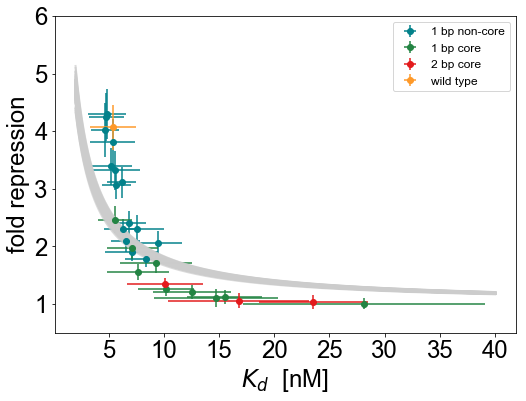

In [47]:
fig = plt.figure()

k = np.linspace(2, 40, 400)

for C0, C1, Erp in samples2_end[np.random.randint(len(samples2_end), size=100)]:
    plt.plot(k, FR_single(C0, C1, Erp, k), color='#cccccc', lw=2, alpha=0.7)
nc1 = plt.errorbar(Kd_A_1nc, FR_A_1nc, xerr=Kderr_A_1nc, yerr=FRerr_A_1nc, 
             fmt='o', color='#02818a', label='1 bp non-core')
c1 = plt.errorbar(Kd_A_1c, FR_A_1c, xerr=Kderr_A_1c, yerr=FRerr_A_1c, 
             fmt='o', color='#238443', label='1 bp core')
c2 = plt.errorbar(Kd_A_2c, FR_A_2c, xerr=Kderr_A_2c, yerr=FRerr_A_2c, 
             fmt='o', color='#e31a1c', label='2 bp core')
wt = plt.errorbar(Kd_A_wt, FR_A_wt, xerr=Kderr_A_wt, yerr=FRerr_A_wt, 
             fmt='o', color='#fe9929', label='wild type')

plt.ylim(0.5, 6)
#plt.xlim(0, 90)

plt.legend(handles=[nc1, c1, c2, wt], fontsize=12)

plt.xlabel('$K_{d}$  [nM]')
plt.ylabel('fold repression')

figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'12','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

plt.savefig('AAA_1BS_fit.pdf',dpi=150,transparent=True, bbox_inches='tight')
plt.show()

In [50]:
samples1 = sampler.chain[:,:,:].reshape((-1,ndim))
samples1_end = sampler.chain[:, 8000:, :].reshape((-1,ndim))

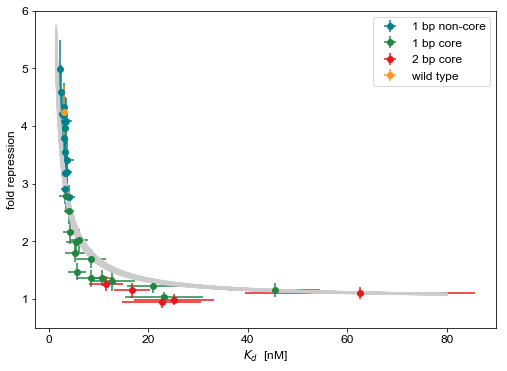

In [51]:
fig = plt.figure()

k = np.linspace(1.5, 80, 400)

for C0, C1, Erp in samples1_end[np.random.randint(len(samples1_end), size=100)]:
    plt.plot(k, FR_single(C0, C1, Erp, k), color='#cccccc', lw=2, alpha=0.7)
nc1 = plt.errorbar(Kd_B_1nc, FR_B_1nc, xerr=Kderr_B_1nc, yerr=FRerr_B_1nc, 
             fmt='o', color='#02818a', label='1 bp non-core')
c1 = plt.errorbar(Kd_B_1c, FR_B_1c, xerr=Kderr_B_1c, yerr=FRerr_B_1c, 
             fmt='o', color='#238443', label='1 bp core')
c2 = plt.errorbar(Kd_B_2c, FR_B_2c, xerr=Kderr_B_2c, yerr=FRerr_B_2c, 
             fmt='o', color='#e31a1c', label='2 bp core')
wt = plt.errorbar(Kd_B_wt, FR_B_wt, xerr=Kderr_B_wt, yerr=FRerr_B_wt, 
             fmt='o', color='#fe9929', label='wild type')

plt.ylim(0.5, 6)
#plt.xlim(0, 90)

plt.legend(handles=[nc1, c1, c2, wt], fontsize=12)

plt.xlabel('$K_{d}$  [nM]')
plt.ylabel('fold repression')

figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'12','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

#plt.savefig('BCB_1BS_fit.pdf',dpi=150,transparent=True, bbox_inches='tight')
plt.show()

Quantiles:
[(0.16, 0.013941090823575784), (0.5, 0.015501767872623296), (0.84, 0.017417305689725444)]
Quantiles:
[(0.16, 444.1183895904006), (0.5, 494.77760206472055), (0.84, 545.1835470246647)]
Quantiles:
[(0.16, 9.407338245340203), (0.5, 11.346028258765413), (0.84, 14.200181008135146)]


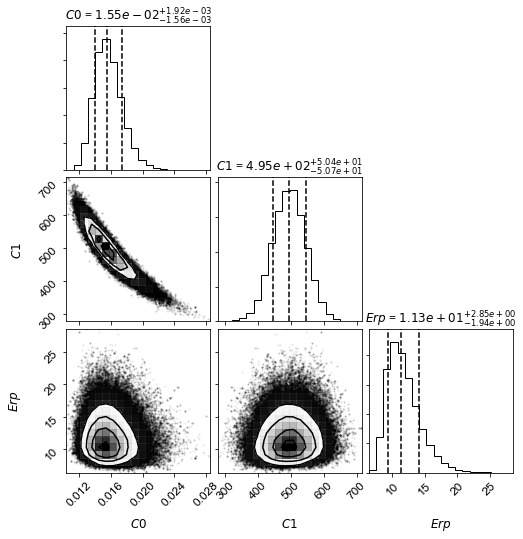

In [52]:
df = pd.DataFrame(samples2)
df.to_csv(path_or_buf='samplesout_AAA.csv', sep=',')

df1 = pd.read_csv('samplesout_AAA.csv', delimiter=',')

iterations = 10000
tburn = 1000

data2 = np.zeros((df1.shape[0]-tburn*nwalkers)*(df1.shape[1]-1)).reshape((df1.shape[0]-(tburn*nwalkers)), (df1.shape[1]-1))


for i in range(0, int(df1.shape[1]-1)):
    for j in range(1, nwalkers+1):
        data2[(iterations - tburn)*(j - 1):(iterations - tburn)*(j),i]=np.array(df1.iloc[iterations*j - iterations + tburn: iterations*j, i + 1])
        
parameternames = ["$C0$", "$C1$", "$Erp$"]

fig = corner.corner(data2, 
                    labels=parameternames, 
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, 
                    title_fmt='.2e', 
                    title_kwargs={"fontsize": 12},
                    verbose=True)

#plt.savefig('BCB_1BS_Erp_corner.pdf',dpi=150,transparent=True, bbox_inches='tight')
plt.show()

In [53]:
np.random.seed(0) # For reproducible outputs
modelscale=np.linspace(2.25, 80, 400)
numberofmodeltraces=10000

ypred1=np.zeros((len(modelscale),numberofmodeltraces))
ypred2=np.zeros((len(modelscale),numberofmodeltraces))

i=0
for C0, C1, Erp in samples1[np.random.randint(len(samples1), size=numberofmodeltraces)]:
    ypred1[:, i] = FR_single(C0, C1, Erp, modelscale)
    i+=1

# 2-sigma distributions
quant1=[np.mean(ypred1, axis=1)-2*np.std(ypred1, axis=1),
        np.mean(ypred1, axis=1),
        np.mean(ypred1, axis=1)+2*np.std(ypred1, axis=1)]


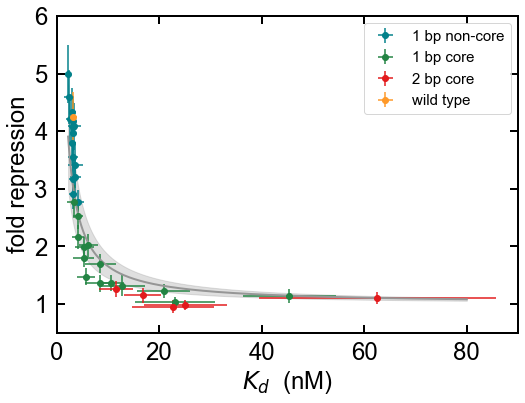

In [55]:
fig, ax = plt.subplots()

plt.fill_between(modelscale, quant1[0], quant1[2], color='#969696', alpha=0.3)
        
plt.plot(modelscale, quant1[1], '-', color='#969696', alpha=1, lw=2)

nc1 = plt.errorbar(Kd_B_1nc, FR_B_1nc, xerr=Kderr_B_1nc, yerr=FRerr_B_1nc, 
             fmt='o', color='#02818a', label='1 bp non-core')
c1 = plt.errorbar(Kd_B_1c, FR_B_1c, xerr=Kderr_B_1c, yerr=FRerr_B_1c, 
             fmt='o', color='#238443', label='1 bp core')
c2 = plt.errorbar(Kd_B_2c, FR_B_2c, xerr=Kderr_B_2c, yerr=FRerr_B_2c, 
             fmt='o', color='#e31a1c', label='2 bp core')
wt = plt.errorbar(Kd_B_wt, FR_B_wt, xerr=Kderr_B_wt, yerr=FRerr_B_wt, 
             fmt='o', color='#fe9929', label='wild type')

plt.ylim(0.5, 6)
plt.xlim(0, 90)

plt.legend(handles=[nc1, c1, c2, wt], fontsize=15)

plt.xlabel('$K_{d}$  (nM)')
plt.ylabel('fold repression')

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 

ax.tick_params(which='major', width=2, length=8, pad=9,direction='in',top=True,right=True)
ax.tick_params(which='minor', width=2, length=4, pad=9,direction='in',top=True,right=True)

figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'24','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

plt.savefig('BCB_1BS_tuning_shaded.pdf',dpi=150,transparent=True, bbox_inches='tight')
plt.show()

In [62]:
np.random.seed(0) # For reproducible outputs
modelscale=np.linspace(2.25, 40, 400)
numberofmodeltraces=10000

ypred1=np.zeros((len(modelscale),numberofmodeltraces))
ypred2=np.zeros((len(modelscale),numberofmodeltraces))

i=0
for C0, C1, Erp in samples2[np.random.randint(len(samples2), size=numberofmodeltraces)]:
    ypred1[:, i] = FR_single(C0, C1, Erp, modelscale)
    i+=1

# 2-sigma distributions
quant2=[np.mean(ypred1, axis=1)-2*np.std(ypred1, axis=1),
        np.mean(ypred1, axis=1),
        np.mean(ypred1, axis=1)+2*np.std(ypred1, axis=1)]


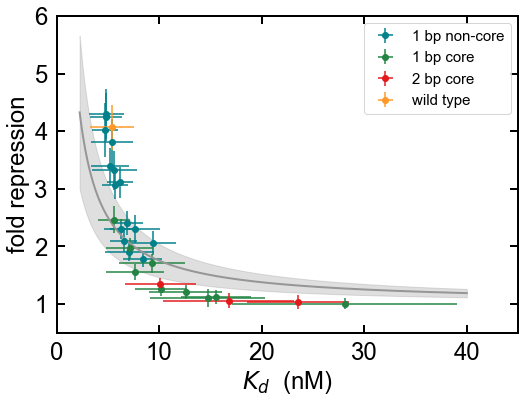

In [63]:
fig, ax = plt.subplots()


plt.fill_between(modelscale, quant2[0], quant2[2], color='#969696', alpha=0.3)
        
plt.plot(modelscale, quant2[1], '-', color='#969696', alpha=1, lw=2)

nc1 = plt.errorbar(Kd_A_1nc, FR_A_1nc, xerr=Kderr_A_1nc, yerr=FRerr_A_1nc, 
             fmt='o', color='#02818a', label='1 bp non-core')
c1 = plt.errorbar(Kd_A_1c, FR_A_1c, xerr=Kderr_A_1c, yerr=FRerr_A_1c, 
             fmt='o', color='#238443', label='1 bp core')
c2 = plt.errorbar(Kd_A_2c, FR_A_2c, xerr=Kderr_A_2c, yerr=FRerr_A_2c, 
             fmt='o', color='#e31a1c', label='2 bp core')
wt = plt.errorbar(Kd_A_wt, FR_A_wt, xerr=Kderr_A_wt, yerr=FRerr_A_wt, 
             fmt='o', color='#fe9929', label='wild type')

plt.ylim(0.5, 6)
plt.xlim(0, 45)

plt.legend(handles=[nc1, c1, c2, wt], fontsize=15)

plt.xlabel('$K_{d}$  (nM)')
plt.ylabel('fold repression')

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 

ax.tick_params(which='major', width=2, length=8, pad=9,direction='in',top=True,right=True)
ax.tick_params(which='minor', width=2, length=4, pad=9,direction='in',top=True,right=True)

figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'24','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

plt.savefig('AAA_1BS_tuning_shaded.pdf',dpi=150,transparent=True, bbox_inches='tight')
plt.show()

In [64]:
#Pcoop AAA
dfA2 = pd.read_csv('1_ZFBS_tuning_AAA_NAND.csv',header=None)
dfA2 = dfA2.rename(columns={0: '∆G', 1: 'fold-repression', 2: 'fr error'})

dfA2_1 = pd.read_csv('1_ZFBS_tuning_AAA_NAND_err.csv')

#sort data - lowest to highest ∆G
x3 = np.array(dfA2['∆G'])
y3 = np.array(dfA2['fold-repression'])
z3 = np.array(dfA2['fr error'])

xyz3 = np.column_stack((x3, y3, z3))

col = 0
data3 = xyz3[np.argsort(xyz3[:, col])]

dG_A2 = data3[:, 0]
FR_A2 = data3[:, 1]
FRerr_A2 = data3[:, 2]

#Kd in nM
Kd_A2 = np.exp(dG_A2/0.5921)*1e9

dfA2_v2 = pd.DataFrame()
dfA2_v2['fold-repression'] = FR_A2
dfA2_v2['fr error'] = FRerr_A2
dfA2_v2['Kd'] = Kd_A2
dfA2_v2['Kd err'] = dfA2_1['Kd err']

mutlabels3 = []

mutlabels3.append('wild type')
mutlabels3.append('1 bp non-core')
mutlabels3.append('1 bp core')
mutlabels3.append('1 bp non-core')

for i in range(2):
    mutlabels3.append('1 bp core')

for i in range(2):
    mutlabels3.append('1 bp non-core')

mutlabels3.append('1 bp core')

dfA2_v2['mutation type'] = mutlabels3

#AAA Pcoop

# 1 bp core
ind2_1c = dfA2_v2['mutation type'] == '1 bp core'
dfA2_1c = dfA2_v2.loc[ind2_1c, :]
Kd_A2_1c = np.array(dfA2_1c['Kd'])
Kderr_A2_1c = np.array(dfA2_1c['Kd err'])
FR_A2_1c = np.array(dfA2_1c['fold-repression'])
FRerr_A2_1c = np.array(dfA2_1c['fr error'])

# 1 bp non-core
ind2_1nc = dfA2_v2['mutation type'] == '1 bp non-core'
dfA2_1nc = dfA2_v2.loc[ind2_1nc, :]
Kd_A2_1nc = np.array(dfA2_1nc['Kd'])
Kderr_A2_1nc = np.array(dfA2_1nc['Kd err'])
FR_A2_1nc = np.array(dfA2_1nc['fold-repression'])
FRerr_A2_1nc = np.array(dfA2_1nc['fr error'])

# wild type
ind2_wt = dfA2_v2['mutation type'] == 'wild type'
dfA2_wt = dfA2_v2.loc[ind2_wt, :]
Kd_A2_wt = np.array(dfA2_wt['Kd'])
Kderr_A2_wt = np.array(dfA2_wt['Kd err'])
FR_A2_wt = np.array(dfA2_wt['fold-repression'])
FRerr_A2_wt = np.array(dfA2_wt['fr error'])

In [67]:
samples3 = sampler.chain[:,:,:].reshape((-1,ndim))
samples3_end = sampler.chain[:, 8000:, :].reshape((-1,ndim))

In [72]:
np.random.seed(0) # For reproducible outputs
modelscale=np.linspace(2.25, 40, 400)
numberofmodeltraces=10000

ypred1=np.zeros((len(modelscale),numberofmodeltraces))
ypred2=np.zeros((len(modelscale),numberofmodeltraces))

i=0
for C0, C1, Erp in samples3[np.random.randint(len(samples3), size=numberofmodeltraces)]:
    ypred1[:, i] = FR_single(C0, C1, Erp, modelscale)
    i+=1

# 2-sigma distributions
quant3=[np.mean(ypred1, axis=1)-2*np.std(ypred1, axis=1),
        np.mean(ypred1, axis=1),
        np.mean(ypred1, axis=1)+2*np.std(ypred1, axis=1)]


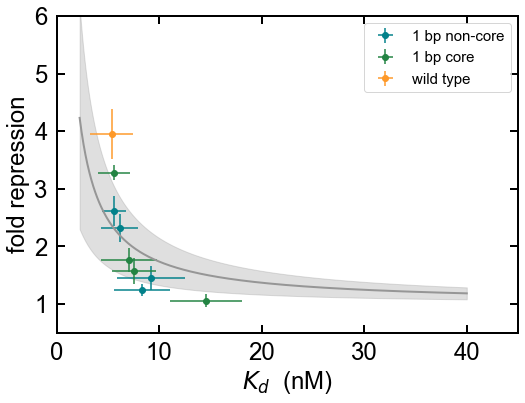

In [73]:
fig, ax = plt.subplots()


plt.fill_between(modelscale, quant3[0], quant3[2], color='#969696', alpha=0.3)
        
plt.plot(modelscale, quant3[1], '-', color='#969696', alpha=1, lw=2)

nc1 = plt.errorbar(Kd_A2_1nc, FR_A2_1nc, xerr=Kderr_A2_1nc, yerr=FRerr_A2_1nc, 
             fmt='o', color='#02818a', label='1 bp non-core')
c1 = plt.errorbar(Kd_A2_1c, FR_A2_1c, xerr=Kderr_A2_1c, yerr=FRerr_A2_1c, 
             fmt='o', color='#238443', label='1 bp core')
wt = plt.errorbar(Kd_A2_wt, FR_A2_wt, xerr=Kderr_A2_wt, yerr=FRerr_A2_wt, 
             fmt='o', color='#fe9929', label='wild type')

plt.ylim(0.5, 6)
plt.xlim(0, 45)

plt.legend(handles=[nc1, c1, wt], fontsize=15)

plt.xlabel('$K_{d}$  (nM)')
plt.ylabel('fold repression')


ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 

ax.tick_params(which='major', width=2, length=8, pad=9,direction='in',top=True,right=True)
ax.tick_params(which='minor', width=2, length=4, pad=9,direction='in',top=True,right=True)

figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'24','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

plt.savefig('AAA_Pcoop_tuning_shaded.pdf',dpi=150,transparent=True, bbox_inches='tight')
plt.show()